In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
df = pd.read_csv('IBM HR Employee Attrition.csv')


In [41]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2})
df['Department'] = df['Department'].map({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

df['EducationField'] = df['EducationField'].map({
    'Life Sciences': 0, 
    'Other': 1, 
    'Medical': 2,
    'Marketing': 3, 
    'Technical Degree': 4, 
    'Human Resources': 5
})

df['JobRole'] = df['JobRole'].map({
    'Sales Executive': 0, 
    'Research Scientist': 1, 
    'Laboratory Technician': 2,
    'Manufacturing Director': 3, 
    'Healthcare Representative': 4, 
    'Manager': 5,
    'Sales Representative': 6, 
    'Research Director': 7, 
    'Human Resources': 8
})

df['MaritalStatus'] = df['MaritalStatus'].map({
    'Single': 0, 
    'Married': 1, 
    'Divorced': 2
})

df = df.drop('Over18', axis=1)

df['OverTime'] = df['OverTime'].map({'No': 0, 'Yes': 1})


In [42]:
df.drop(columns=['StockOptionLevel', 'YearsAtCompany',
       'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction',
       'DistanceFromHome', 'EducationField', 'Department', 'WorkLifeBalance',
       'TrainingTimesLastYear', 'DailyRate', 'RelationshipSatisfaction',
       'NumCompaniesWorked', 'YearsSinceLastPromotion', 'Education', 'Gender',
       'JobRole', 'MonthlyRate', 'PercentSalaryHike', 'EmployeeNumber',
       'HourlyRate', 'PerformanceRating', 'BusinessTravel', 'EmployeeCount',
       'StandardHours'], inplace=True)


In [43]:
df["Attrition"] = df.pop("Attrition")
df

,Age,JobLevel,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,YearsWithCurrManager,Attrition
0,41,2,0,5993,1,8,4,5,1
1,49,2,1,5130,0,10,7,7,0
2,37,1,0,2090,1,7,0,0,1
3,33,1,1,2909,1,8,7,0,0
4,27,1,1,3468,0,6,2,2,0
...,...,...,...,...,...,...,...,...,...
1465,36,2,1,2571,0,17,2,3,0
1466,39,3,1,9991,0,9,7,7,0
1467,27,2,1,6142,1,6,2,3,0
1468,49,2,1,5390,0,17,6,8,0


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
salary_column = df["MonthlyIncome"].values.reshape(-1, 1)
age_column = df["Age"].values.reshape(-1, 1)


sc.fit(salary_column)
standardized_salary = sc.transform(salary_column)
df["MonthlyIncome"] = standardized_salary

sc.fit(age_column)
standardized_age = sc.transform(age_column)
df["Age"] = standardized_age


In [45]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].values


In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.25, random_state=0)


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#find ideal paramters for randomforest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

RF = RandomForestClassifier(random_state=0)
grid = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x_train,y_train)
print(grid.best_params_)
print(grid.best_score_)





Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
954 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\krujo\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\krujo\anaconda3\Lib\site-pack

{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.858457424928013


In [69]:
#train model
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=2, max_features='sqrt', bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[302,   8],
       [ 43,  15]], dtype=int64)

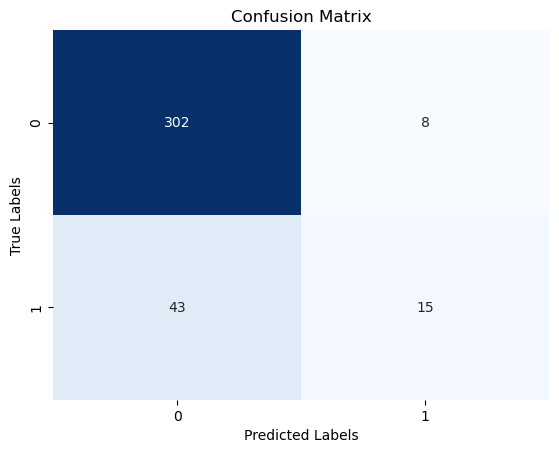

In [79]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [71]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred)
ac*100

86.1413043478261